## Exploratory Analysis for Jewelry_Type = 'Rings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


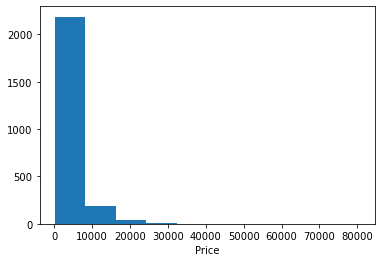

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

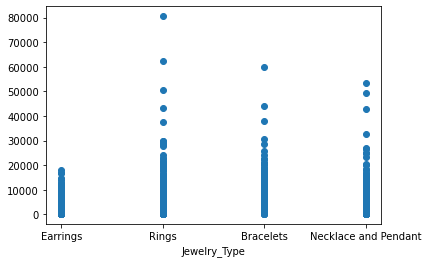

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone3_Desc', 'Stone3_Carat', 'Stone3_Stone', 'Stone3_Color','Stone3_Cut',                               
                                  'Stone4_Desc', 'Stone4_Carat', 'Stone4_Stone', 'Stone4_Color','Stone4_Cut',
                                  'Stone5_Desc','Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
                                  'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color','Stone6_Cut'])

In [10]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [11]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

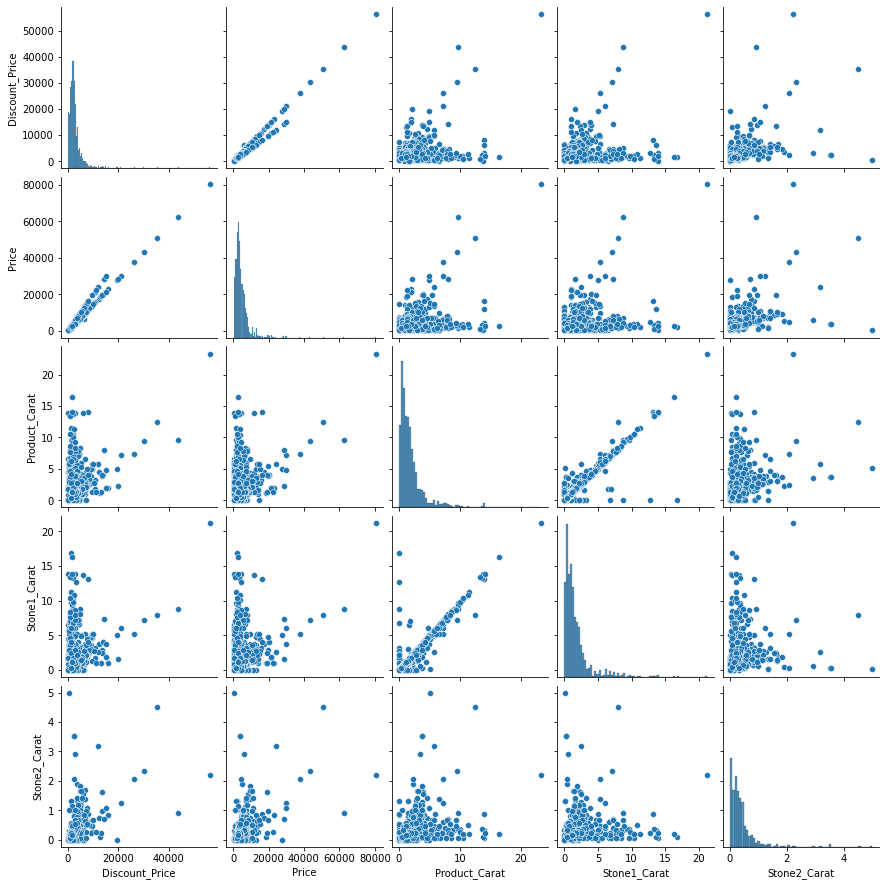

In [12]:
sns.pairplot(df_rings)
plt.show()

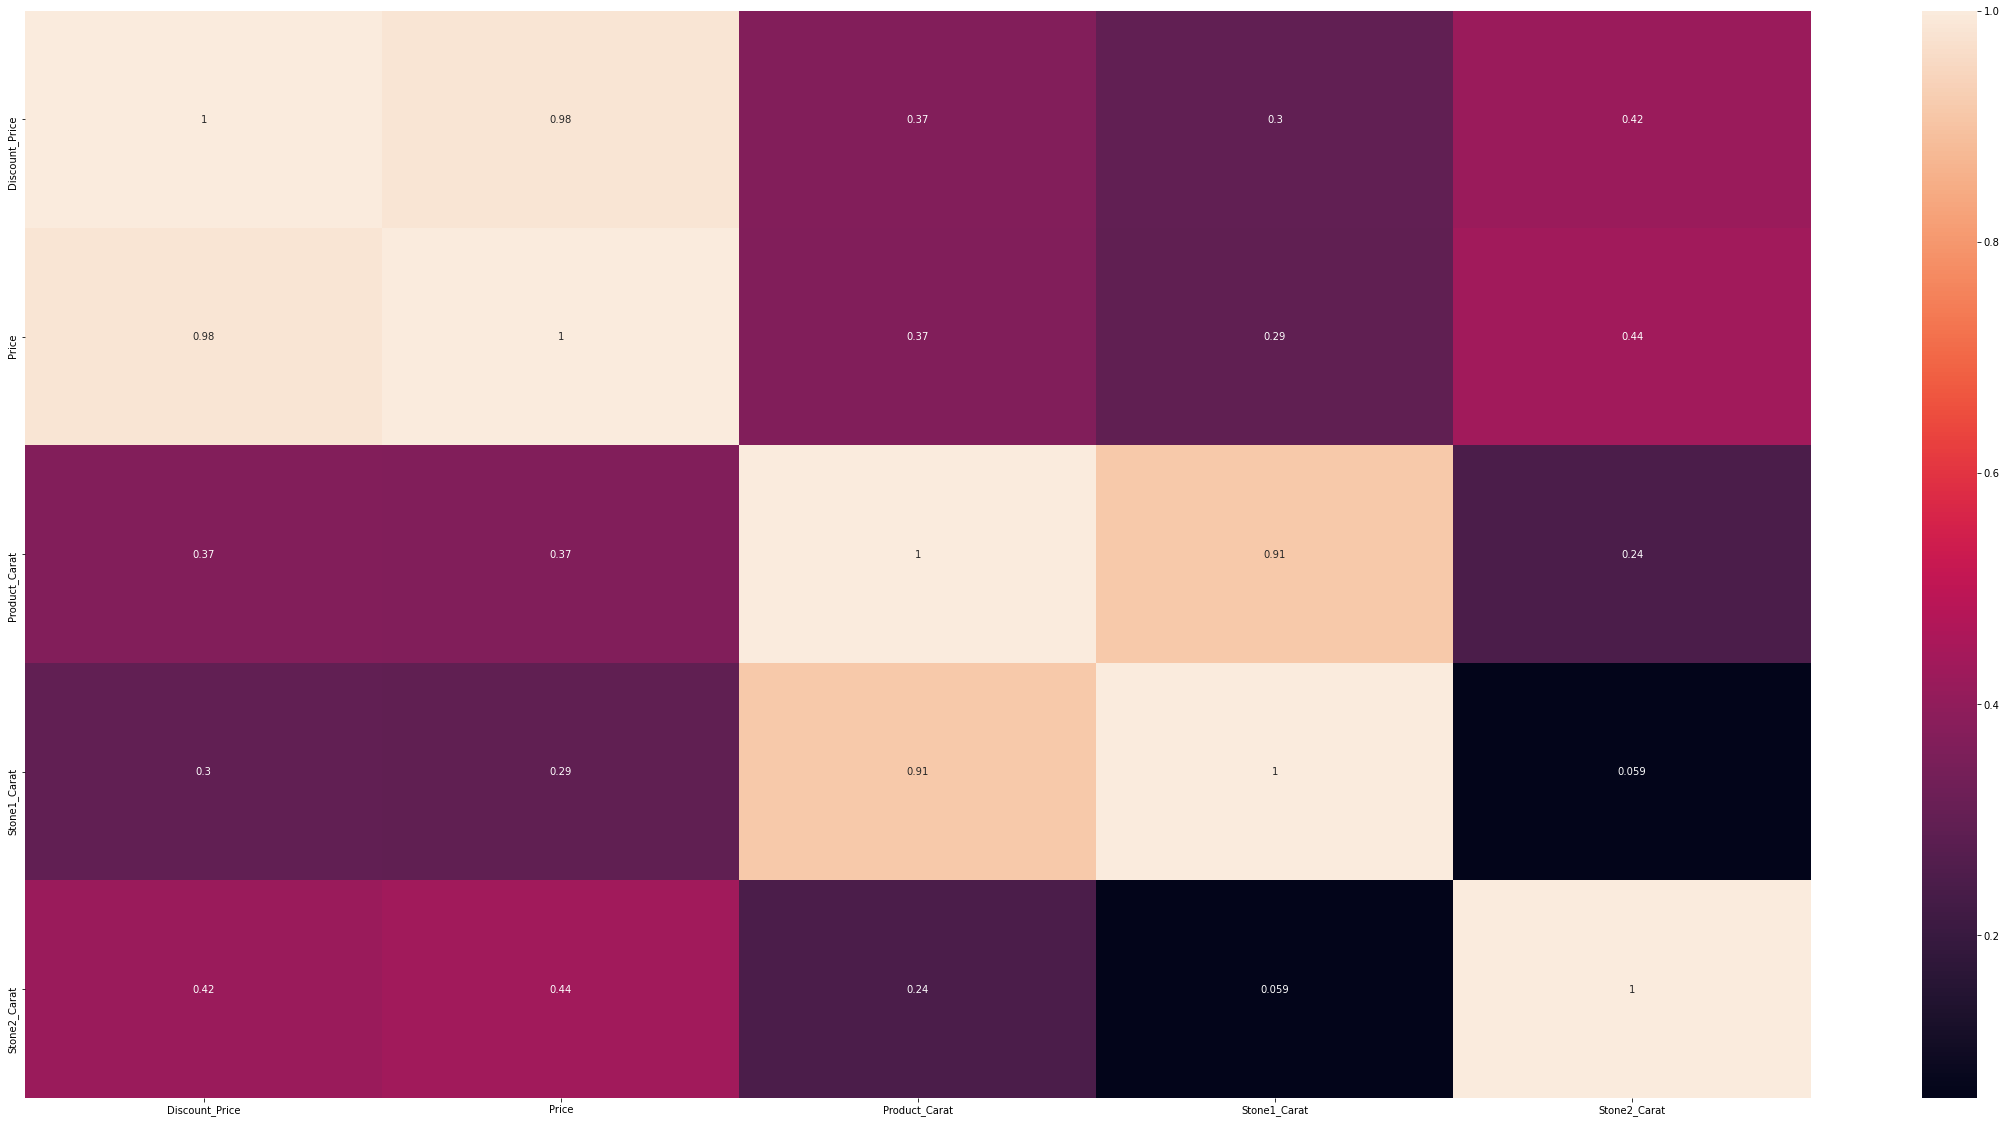

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [14]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [15]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

In [16]:
idx = df_rings[df_rings['Metal'] =='Stainless Steel & 18K Gold'].index
df_rings.drop(idx,inplace=True)

In [17]:
#df_rings[df_rings['Metal Color'] == '']
df_rings.loc[(df_rings['Stone1_Stone'] == 'Alexandrite') & 
             (df_rings['Stone1_Color'].str.isspace()),
            'Stone1_Color'] = 'Bluish-Green'

In [18]:
df_rings['Stone1_Stone'] = df_rings['Stone1_Stone'].str.replace('Lazuli','Lapis-Lazuli')

In [19]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst')]

In [20]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Greenish-Blue'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine')]

In [21]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Yellow'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine')]

In [22]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond')]

In [23]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald')]

In [24]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet')]

In [25]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Pink'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Color'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Sapphire'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Black'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Smokey'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Turquoise'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise')]


In [26]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey')]

,Description,Discount_Price,Price,Metal,Metal Color,Stones,Jewelry_Type,Product_Carat,Stone1_Desc,Stone1_Carat,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Desc,Stone2_Carat,Stone2_Stone,Stone2_Color,Stone2_Cut
1285,"Effy Mosaic Sterling Silver Multi Gemstone Ring, 1.66 TCW",157.5,225.0,Sterling Silver,Sterling Silver,"Smokey Quartz, Peridot, Garnet, Citrine, Amethyst, Blue Topaz and Garnet",Rings,1.66,Smokey Quartz,0.0,Quartz,Smokey,Smokey,Peridot,0.0,Peridot,,


In [27]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey'), 'Stone1_Cut'] = 'Oval'

In [28]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') &
            (df_rings['Stone1_Cut'].str.isspace()), 'Stone1_Cut'] = 'Round'

In [29]:
df_rings.drop(df_rings[df_rings['Stone1_Stone']== ' '].index,inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Band'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Bands'].index, inplace=True)

df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0M486DTR'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0P637D26'].index, inplace=True)



In [30]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'White'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond')]

In [31]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald')]

In [32]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet')]

In [33]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Multi-Sapphire'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

In [34]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire')]


In [35]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Cut'].str.isspace()),
             'Stone2_Cut'] = 'Oval'

In [36]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Tsavorite') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

In [37]:
df_rings[['Stones','Product_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
             (df_rings['Stone2_Carat'] == 0)]

,Stones,Product_Carat
425,"Round Diamond, Round Black Diamond , Round Cognac Diamond",1.47
619,"Round Cognac Diamond, Round Diamond ,",0.46
623,"Round Diamond, Round Black Diamond , Round Cognac Diamond ,",0.72
626,"Round Diamond, Round Black Diamond , Round Emerald 0.05,",1.40
631,"Round Diamond, Round Cognac Diamond , Round Emerald 0.19",2.89
635,"Round Cognac Diamond, Round Diamond ,",0.89
636,"Round Diamond, Round Cognac Diamond , Round Emerald 0.02,",0.66
637,"Round Diamond, Round Cognac Diamond , Round Emerald 0.06,",1.35
648,"Round Diamond, Round Black Diamond ,",1.28
674,"Round Black Diamond, Round Diamond ,",1.64


In [38]:
#df_rings[['Stones','Product_Carat','Stone1_Carat','Stone2_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
 #            (df_rings['Stone2_Carat'] == 0), ['Stone1_Carat','Stone2_Carat'] = df_rings['Product_Carat']/2


for index, row in df_rings.iterrows():
    if (row['Stone1_Carat'] == 0 ) & (row['Stone2_Carat'] == 0):
        c = row['Product_Carat'] / 2 
        #print('Divided c: ', c )
        
        df_rings.at[index, 'Stone1_Carat'] = c
        df_rings.at[index, 'Stone2_Carat'] = c
        #print()
 
                                                                       
                                                                       

In [39]:
#Droping rows with 'Pearl' as Stone1 as Stone1_Carat is 0
#df_rings.drop(df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')], axis=0)
df_rings.drop(df_rings[df_rings['Stone1_Stone'] == 'Pearl'].index, inplace=True)

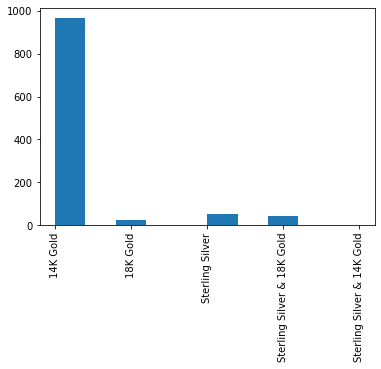

In [40]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

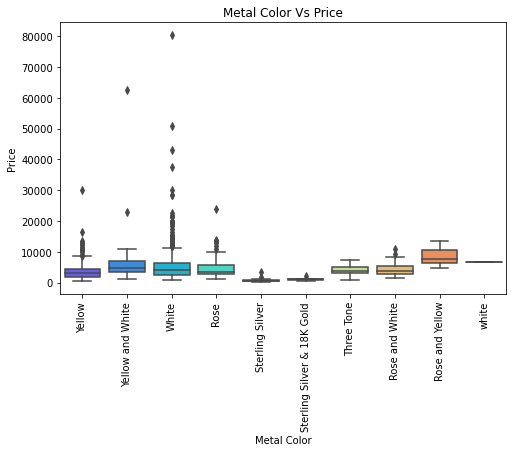

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

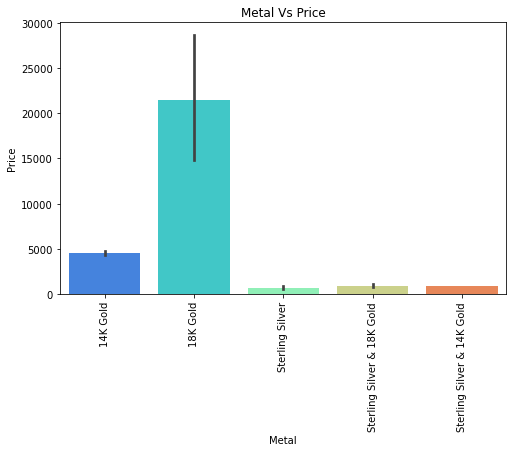

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

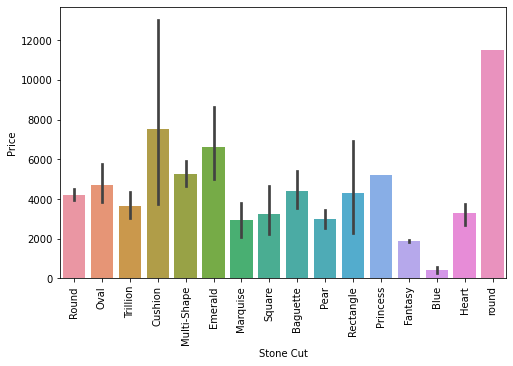

In [43]:
sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings)
plt.xlabel('Stone Cut')
#plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

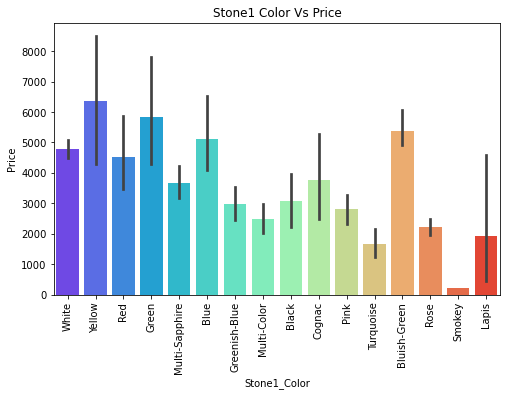

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

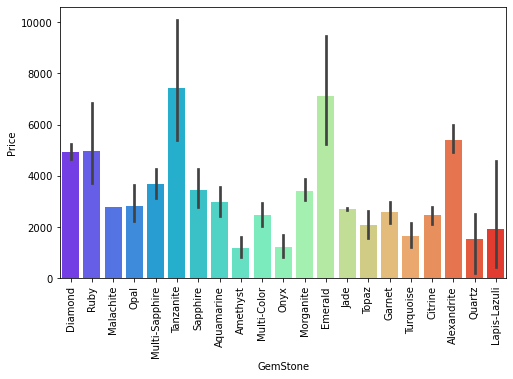

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
#plt.title("Stone1 Vs Price")
plt.xlabel('GemStone')
plt.xticks(rotation=90)
plt.show()

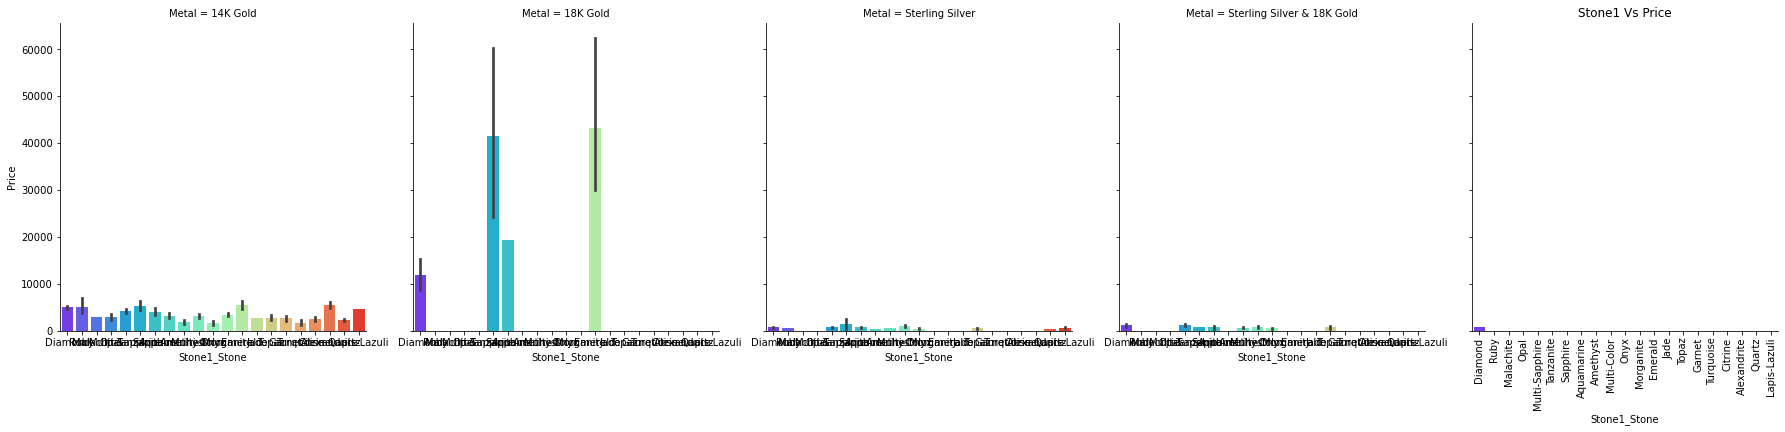

In [46]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

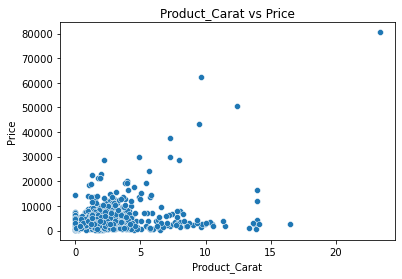

In [47]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

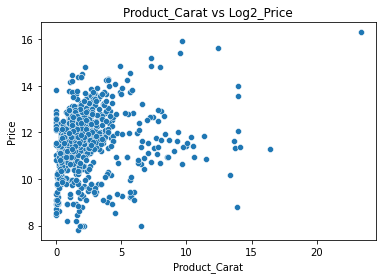

In [48]:
sns.scatterplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

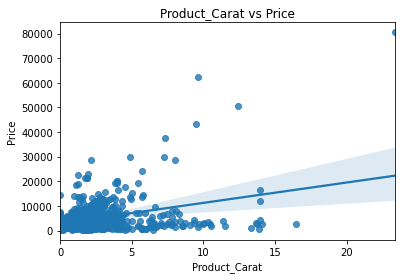

In [49]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

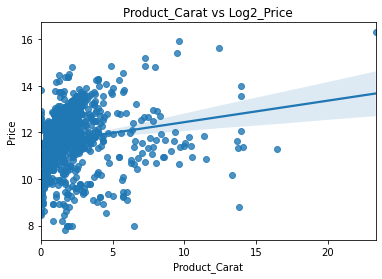

In [50]:
sns.regplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

## Pre-processing & Training Data Development

In [51]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [52]:
df_rings.isnull().sum()

Description         0
Discount_Price      0
Price               0
Metal               0
Metal Color         0
Stones              0
Jewelry_Type        0
Product_Carat       0
Stone1_Desc         0
Stone1_Carat        0
Stone1_Stone        0
Stone1_Color        0
Stone1_Cut          0
Stone2_Desc       519
Stone2_Carat      519
Stone2_Stone      519
Stone2_Color      519
Stone2_Cut        519
dtype: int64

In [53]:
df_rings['Stone2_Carat'].fillna(0, inplace=True)

In [54]:
#Check the range of Stone1 Carat
sc1 = pd.cut(df_rings['Stone1_Carat'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], 
             labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19' ,'19-20','20-21','21-22'])

sc1.value_counts()

0-1      483
1-2      316
2-3      146
3-4       44
6-7       19
4-5       18
5-6       17
7-8       15
8-9        9
13-14      8
9-10       4
10-11      4
16-17      2
11-12      1
12-13      1
21-22      1
20-21      0
14-15      0
15-16      0
17-18      0
18-19      0
19-20      0
Name: Stone1_Carat, dtype: int64

In [55]:
df_rings['Stone1_Stone'].value_counts()

Diamond           554
Sapphire           77
Tanzanite          76
Emerald            68
Multi-Sapphire     61
Ruby               52
Multi-Color        36
Topaz              27
Morganite          24
Aquamarine         20
Amethyst           17
Onyx               16
Opal               15
Garnet             12
Citrine            11
Turquoise           8
Alexandrite         5
Lapis-Lazuli        3
Quartz              3
Jade                2
Malachite           1
Name: Stone1_Stone, dtype: int64

In [56]:
#sns.countplot(data=df_rings ,x ='Stone1_Stone',order = df_rings['Stone1_Stone'].value_counts().index)
#plt.xticks(rotation='vertical')
#plt.show()

In [57]:
#For diamonds what is the type of stone cut
df_rings[['Stone1_Cut']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Cut 
Round          478
Multi-Shape     65
Baguette         5
Cushion          4
round            1
Pear             1
dtype: int64

In [58]:
#For diamonds what is the type of stone color
df_rings[['Stone1_Color']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Color
White           501
Yellow           20
Black            18
Cognac           12
Blue              3
dtype: int64

In [59]:
#For diamonds what is the type of stone carat
df_rings[['Stone1_Carat']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Carat
0.390           14
1.000           11
0.980           10
0.560            9
0.350            9
0.240            9
0.370            9
0.310            9
0.650            8
0.400            8
0.230            8
0.530            8
0.770            7
0.340            7
0.490            7
0.710            7
1.210            6
0.520            6
0.590            6
0.540            6
0.360            6
0.440            6
0.500            6
0.700            6
0.620            6
0.470            5
0.950            5
0.320            5
0.410            5
0.510            5
0.290            5
0.260            5
0.720            5
0.930            5
0.200            5
1.370            5
0.820            5
0.420            4
0.810            4
0.730            4
0.900            4
0.660            4
1.480            4
0.070            4
1.470            4
0.480            4
0.880            4
0.130            4
0.580            4
0.330            4
0.970            4
0.840            4

In [60]:
df_rings['Stone2_Stone'].value_counts()

Diamond           514
Emerald            21
Tsavorite          10
Sapphire            9
Ruby                3
Multi-Sapphire      3
Width;              2
Peridot             2
Topaz               2
Garnet              2
Amethyst            1
Name: Stone2_Stone, dtype: int64

In [61]:
#For diamonds what is the type of stone cut
df_rings[['Stone2_Cut']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Cut 
Round          477
Multi-Shape     35
oval             1
Baguette         1
dtype: int64

In [62]:
#For diamonds what is the type of stone color
df_rings[['Stone2_Color']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Color
White           497
Cognac            9
Black             7
Blue              1
dtype: int64

In [63]:
#For diamonds what is the type of stone carat
df_rings[['Stone2_Carat']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Carat
0.200           18
0.240           17
0.250           14
0.220           13
0.150           13
0.440           12
0.330           12
0.230           12
0.140           11
0.390           11
0.290           11
0.090           11
0.270           10
0.050           10
0.080           10
0.060           10
0.410            9
0.370            9
0.070            9
0.310            9
0.470            9
0.190            8
0.180            8
0.110            8
0.360            8
0.420            7
0.380            7
0.480            7
0.350            7
0.130            7
0.120            7
0.280            7
0.260            7
0.340            6
0.210            6
0.460            6
0.170            6
0.160            6
0.650            5
0.540            5
0.040            5
0.450            5
0.580            4
0.510            4
0.590            4
0.520            4
0.640            4
0.500            4
0.840            4
0.490            3
0.550            3
0.570            3

In [64]:
sc2 = pd.cut(df_rings['Stone2_Carat'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22], 
             labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19' ,'19-20','20-21','21-22'])

sc2.value_counts()

0-1      524
1-2       29
2-3        5
3-4        4
4-5        2
20-21      0
5-6        0
6-7        0
7-8        0
8-9        0
9-10       0
21-22      0
11-12      0
12-13      0
13-14      0
14-15      0
15-16      0
16-17      0
17-18      0
18-19      0
19-20      0
10-11      0
Name: Stone2_Carat, dtype: int64

In [65]:
#writer = pd.ExcelWriter('/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/All_EDA_Rings.xlsx')

#Write Rings Data 
#df_rings.to_excel(writer, 'Rings_data')
#writer.save()

In [66]:
#Group by Stone1, Carat Columns 

gsca = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone','Stone1_Carat']).size().reset_index(name='counts')
gsca
#gsca.to_excel(writer, 'Stone1_Carat')
#writer.save()


,Stone1_Stone,Stone1_Carat,counts
0,Alexandrite,0.330,2
1,Alexandrite,0.420,1
2,Alexandrite,0.720,1
3,Alexandrite,1.000,1
4,Amethyst,0.700,1
5,Amethyst,0.750,1
6,Amethyst,0.950,1
7,Amethyst,1.750,1
8,Amethyst,3.650,1
9,Amethyst,3.900,1


In [67]:
#Group by Stone1 and Carat Columns
gscm = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone']).agg(['min','max','count'])
gscm

#gscm.to_excel(writer,'Stone1_Carat_Aggregates')
#writer.save()

Stone1_Carat             
                        min    max count
Stone1_Stone                            
Alexandrite            0.33   1.00     5
Amethyst               0.70   7.75    17
Aquamarine             0.71   6.85    20
Citrine                3.10   9.79    11
Diamond                0.01   4.62   554
Emerald                0.46   8.72    68
Garnet                 1.23   7.85    12
Jade                  10.40  13.85     2
Lapis-Lazuli           5.24  13.85     3
Malachite              2.10   2.10     1
Morganite              1.15   6.15    24
Multi-Color            0.55  10.13    36
Multi-Sapphire         0.76  13.63    61
Onyx                   0.12  16.80    16
Opal                   0.55   5.05    15
Quartz                 0.83  16.25     3
Ruby                   0.28   7.17    52
Sapphire               0.12  13.11    77
Tanzanite              0.66  21.16    76
Topaz                  0.81  13.90    27
Turquoise              0.25   2.35     8

In [68]:
#Group by Stone1 and Cut Columns
gscu = df_rings[['Stone1_Stone', 'Stone1_Cut']].groupby(['Stone1_Stone','Stone1_Cut']).size().reset_index(name='counts')
gscu
#gscu.to_excel(writer,'Stone1_Cut')
#writer.save()

,Stone1_Stone,Stone1_Cut,counts
0,Alexandrite,Oval,4
1,Alexandrite,Round,1
2,Amethyst,Cushion,5
3,Amethyst,Emerald,2
4,Amethyst,Heart,1
5,Amethyst,Marquise,1
6,Amethyst,Oval,6
7,Amethyst,Rectangle,2
8,Aquamarine,Cushion,4
9,Aquamarine,Emerald,5


In [69]:
#Group by Stone1 and Color Columns
gsco = df_rings[['Stone1_Stone', 'Stone1_Color']].groupby(['Stone1_Stone','Stone1_Color']).size().reset_index(name='counts')
gsco
#gsco.to_excel(writer, 'Stone1_Color')
#writer.save()

,Stone1_Stone,Stone1_Color,counts
0,Alexandrite,Bluish-Green,5
1,Amethyst,Green,17
2,Aquamarine,Greenish-Blue,20
3,Citrine,Yellow,11
4,Diamond,Black,18
5,Diamond,Blue,3
6,Diamond,Cognac,12
7,Diamond,White,501
8,Diamond,Yellow,20
9,Emerald,Green,68


In [70]:
#Group by Stone2, Carat Columns 
gsca = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone','Stone2_Carat']).size().reset_index(name='counts')
gsca
#gsca.to_excel(writer, 'Stone2_Carat')
#writer.save()

,Stone2_Stone,Stone2_Carat,counts
0,Amethyst,0.810,1
1,Diamond,0.000,3
2,Diamond,0.010,2
3,Diamond,0.030,1
4,Diamond,0.040,5
5,Diamond,0.050,10
6,Diamond,0.060,10
7,Diamond,0.070,9
8,Diamond,0.080,10
9,Diamond,0.090,11


In [71]:
#Group by Stone2 and Carat Columns
gscm = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone']).agg(['min','max','count'])
gscm
#gscm.to_excel(writer,'Stone2_Carat_Aggregates')
#writer.save()

Stone2_Carat            
                        min   max count
Stone2_Stone                           
Amethyst               0.81  0.81     1
Diamond                0.00  4.51   514
Emerald                0.02  0.78    21
Garnet                 0.00  0.04     2
Multi-Sapphire         1.14  3.51     3
Peridot                0.00  0.83     2
Ruby                   0.01  2.93     3
Sapphire               0.26  3.54     9
Topaz                  0.30  4.99     2
Tsavorite              0.02  0.05    10
Width;                 1.00  1.00     2

In [72]:
#Group by Stone2 and Cut Columns
gscu = df_rings[['Stone2_Stone', 'Stone2_Cut']].groupby(['Stone2_Stone','Stone2_Cut']).size().reset_index(name='counts')
gscu
#gscu.to_excel(writer,'Stone2_Cut')
#writer.save()

,Stone2_Stone,Stone2_Cut,counts
0,Amethyst,Oval,1
1,Diamond,Baguette,1
2,Diamond,Multi-Shape,35
3,Diamond,Round,477
4,Diamond,oval,1
5,Emerald,Marquise,2
6,Emerald,Multi-Shape,2
7,Emerald,Round,17
8,Garnet,Pear,1
9,Garnet,Round,1


In [73]:
#Group by Stone2 and Color Columns
gsco = df_rings[['Stone2_Stone', 'Stone2_Color']].groupby(['Stone2_Stone','Stone2_Color']).size().reset_index(name='counts')
gsco
#gsco.to_excel(writer, 'Stone2_Color')
#writer.save()

,Stone2_Stone,Stone2_Color,counts
0,Amethyst,,1
1,Diamond,Black,7
2,Diamond,Blue,1
3,Diamond,Cognac,9
4,Diamond,White,497
5,Emerald,Green,21
6,Garnet,Red,2
7,Multi-Sapphire,Multi-Sapphire,3
8,Peridot,Green,2
9,Ruby,Red,3


In [74]:
#'Discount_Price', 'Price', 'Metal', 'Metal Color','Product_Carat','Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
df_rings_1 = df_rings.drop(['Description','Discount_Price', 'Stones', 'Jewelry_Type','Stone1_Desc','Stone2_Desc','Product_Carat'],axis=1)
df_rings_1.columns

Index(['Price', 'Metal', 'Metal Color', 'Stone1_Carat', 'Stone1_Stone',
       'Stone1_Color', 'Stone1_Cut', 'Stone2_Carat', 'Stone2_Stone',
       'Stone2_Color', 'Stone2_Cut'],
      dtype='object')

In [75]:


#df_rings_1['Product_Carat'] = round(df_rings_1['Product_Carat'],1)
#df_rings_1['Stone1_Carat'] = round(df_rings_1['Stone1_Carat'],1)
#df_rings_1['Stone2_Carat'] = round(df_rings_1['Stone2_Carat'],1)


#df_rings_1['Product_Carat'] = df_rings_1['Product_Carat'].astype("int64").astype("category")
#df_rings_1['Stone1_Carat'] = df_rings_1['Stone1_Carat'].astype("int64").astype("category")
#df_rings_1['Stone2_Carat'] = df_rings_1['Stone2_Carat'].astype("int64").astype("category")


<AxesSubplot:>

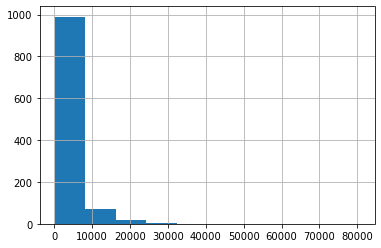

In [76]:
df_rings_1['Price'].hist()

In [77]:

gprice = df_rings_1[['Price']].groupby(['Price']).size().reset_index(name='counts')
gprice.sort_values(by='Price',ascending=False)


,Price,counts
277,80500.0,1
276,62500.0,1
275,50695.0,1
274,43195.0,1
273,37500.0,1
272,29995.0,2
271,28500.0,2
270,23995.0,1
269,22995.0,1
268,22500.0,1


In [78]:
df_rings_1['Price_Category'] = pd.cut(df_rings_1['Price'], bins=[0,2000,4000,6000,7000,8000,9000,10000,20000,30000,np.inf], labels=[1,2,3,4,5,6,7,8,9,10])
df_rings_1 = df_rings_1.drop('Price',axis=1)
    

In [79]:
df_rings_1.isnull().sum()

Metal               0
Metal Color         0
Stone1_Carat        0
Stone1_Stone        0
Stone1_Color        0
Stone1_Cut          0
Stone2_Carat        0
Stone2_Stone      519
Stone2_Color      519
Stone2_Cut        519
Price_Category      0
dtype: int64

In [80]:
df_rings_1.head()

,Metal,Metal Color,Stone1_Carat,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Carat,Stone2_Stone,Stone2_Color,Stone2_Cut,Price_Category
413,14K Gold,Yellow,1.35,Diamond,White,Round,0.12,Diamond,Black,Round,6
414,18K Gold,Yellow and White,0.96,Diamond,Yellow,Round,0.00,NaN,NaN,NaN,5
415,14K Gold,Yellow,0.35,Diamond,White,Round,0.00,NaN,NaN,NaN,1
416,14K Gold,White,1.90,Ruby,Red,Oval,0.59,Diamond,White,Multi-Shape,8
417,14K Gold,White,1.90,Ruby,Red,Oval,1.69,Diamond,White,Round,7


In [81]:
#df_rings_1['Stone3_Cut'] = df_rings_1['Stone3_Cut'].str.replace('Frog','')
#df_rings_1['Stone3_Cut'] = df_rings_1['Stone3_Cut'].str.replace('10mm','')

In [82]:
X = df_rings_1.drop(columns='Price_Category')
y = df_rings_1.Price_Category

In [83]:
y.value_counts()

2     392
1     251
3     224
4      65
8      53
5      48
6      28
7      12
9      10
10      5
Name: Price_Category, dtype: int64

In [84]:
#Change category columns to One Hot Encoding
df_dummy_rings = pd.get_dummies(X)
df_dummy_rings.shape

(1088, 101)

In [85]:
df_dummy_rings.isnull().sum().sort_values(ascending=False)

Stone2_Cut_round                          0
Stone1_Stone_Topaz                        0
Stone1_Stone_Malachite                    0
Stone1_Stone_Morganite                    0
Stone1_Stone_Multi-Color                  0
Stone1_Stone_Multi-Sapphire               0
Stone1_Stone_Onyx                         0
Stone1_Stone_Opal                         0
Stone1_Stone_Quartz                       0
Stone1_Stone_Ruby                         0
Stone1_Stone_Sapphire                     0
Stone1_Stone_Tanzanite                    0
Stone1_Stone_Turquoise                    0
Stone1_Color_Rose                         0
Stone1_Color_Black                        0
Stone1_Color_Blue                         0
Stone1_Color_Bluish-Green                 0
Stone1_Color_Cognac                       0
Stone1_Color_Green                        0
Stone1_Color_Greenish-Blue                0
Stone1_Color_Lapis                        0
Stone1_Color_Multi-Color                  0
Stone1_Color_Multi-Sapphire     

In [86]:
df_rings_1.columns

Index(['Metal', 'Metal Color', 'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color',
       'Stone1_Cut', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut', 'Price_Category'],
      dtype='object')

In [87]:
print(df_dummy_rings.columns.tolist())

['Stone1_Carat', 'Stone2_Carat', 'Metal_14K Gold', 'Metal_18K Gold', 'Metal_Sterling Silver', 'Metal_Sterling Silver & 14K Gold', 'Metal_Sterling Silver & 18K Gold', 'Metal Color_Rose', 'Metal Color_Rose and White', 'Metal Color_Rose and Yellow', 'Metal Color_Sterling Silver', 'Metal Color_Sterling Silver & 18K Gold', 'Metal Color_Three Tone', 'Metal Color_White', 'Metal Color_Yellow', 'Metal Color_Yellow and White', 'Metal Color_white', 'Stone1_Stone_Alexandrite', 'Stone1_Stone_Amethyst', 'Stone1_Stone_Aquamarine', 'Stone1_Stone_Citrine', 'Stone1_Stone_Diamond', 'Stone1_Stone_Emerald', 'Stone1_Stone_Garnet', 'Stone1_Stone_Jade', 'Stone1_Stone_Lapis-Lazuli', 'Stone1_Stone_Malachite', 'Stone1_Stone_Morganite', 'Stone1_Stone_Multi-Color', 'Stone1_Stone_Multi-Sapphire', 'Stone1_Stone_Onyx', 'Stone1_Stone_Opal', 'Stone1_Stone_Quartz', 'Stone1_Stone_Ruby', 'Stone1_Stone_Sapphire', 'Stone1_Stone_Tanzanite', 'Stone1_Stone_Topaz', 'Stone1_Stone_Turquoise', 'Stone1_Color_Black', 'Stone1_Color_B

In [88]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [89]:
X_train.shape, X_test.shape

((761, 101), (327, 101))

## Logistic Regression

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Best: 0.522593 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.522593 (0.040693) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.514699 (0.034143) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.476109 (0.036195) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.501534 (0.032608) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.503727 (0.029323) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.466476 (0.029198) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.469103 (0.028609) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.467353 (0.027696) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.455534 (0.022401) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.451607 (0.021993) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.451607 (0.021993) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.449842 (0.017723) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.442842 (0.016013) wit

In [91]:
logr = LogisticRegression(C=100, penalty= 'l2', solver = 'newton-cg')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)




In [92]:
importances

,Attribute,Importance
30,Stone1_Stone_Onyx,17.402014
36,Stone1_Stone_Topaz,14.107903
91,Stone2_Cut_Cushion,12.880988
78,Stone2_Stone_Topaz,12.880987
83,Stone2_Color_Blue,12.565060
20,Stone1_Stone_Citrine,9.505515
4,Metal_Sterling Silver,7.512504
10,Metal Color_Sterling Silver,7.476779
18,Stone1_Stone_Amethyst,7.150919
38,Stone1_Color_Black,6.045629


In [93]:
#np.array(y_test.tolist())
from sklearn.model_selection import cross_val_score

score=logr.score(X_test, y_test)
print("Test Accuracy Score: ", score)

scores = cross_val_score(logr,X_train,y_train,cv=4,scoring='accuracy')
print("Cross Validation Accuracy Scores: ", scores)

print("Cross Validation min: {} , mean: {} , max :{}".format(scores.min(), scores.mean(), scores.max() ))

Test Accuracy Score:  0.5015290519877675


/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Accuracy Scores:  [0.53403141 0.58947368 0.53157895 0.5       ]
Cross Validation min: 0.5 , mean: 0.5387710112978782 , max :0.5894736842105263


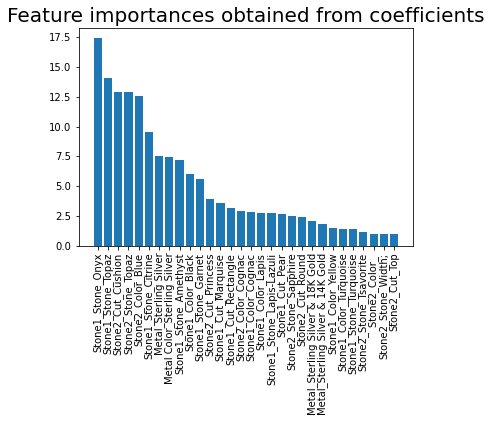

In [94]:
plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
y_pred = logr.predict(X_test)
print("The Accuracy score of prediction: " ,accuracy_score(y_test, y_pred))

The Accuracy score of prediction:  0.5015290519877675


In [96]:
y_test.shape

(327,)

In [97]:
y_pred.shape

(327,)

In [98]:
#Create Confusion Matrix Plot 
from sklearn.metrics import confusion_matrix

labels=[1,2,3,4,5,6,7,8,9,10]
cm = confusion_matrix(y_test, y_pred,labels )
print(cm)

[[40 37  0  0  0  0  0  1  0  0]
 [ 7 92 11  2  0  1  0  3  0  0]
 [ 0 36 22  1  1  0  0  1  0  1]
 [ 0  4 15  2  0  1  1  1  0  0]
 [ 0  2  7  2  1  0  0  1  0  0]
 [ 0  0  3  0  3  0  2  0  0  0]
 [ 0  0  0  1  1  1  0  2  0  0]
 [ 0  0  3  1  1  4  0  7  1  0]
 [ 0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  1  0]]


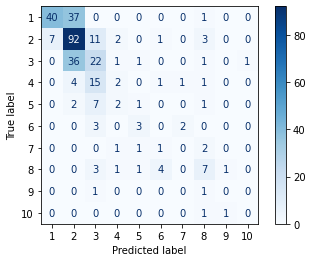

In [99]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.show()

<ipython-input-100-d488826aaf8d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-100-d488826aaf8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


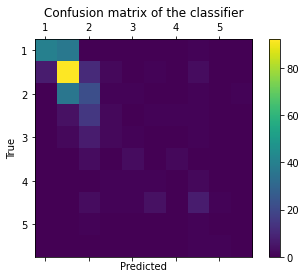

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [101]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.5033453295111247
Recall Score: 0.5015290519877675


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.51      0.64        78
           2       0.54      0.79      0.64       116
           3       0.35      0.35      0.35        62
           4       0.22      0.08      0.12        24
           5       0.14      0.08      0.10        13
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         5
           8       0.39      0.41      0.40        17
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2

    accuracy                           0.50       327
   macro avg       0.25      0.22      0.23       327
weighted avg       0.50      0.50      0.48       327



## Random Forest Model 

In [103]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),http://localhost:8888/notebooks/SpringBoard/DataScience_Capstone2/notebooks/Effy_EDA_Rings.ipynb#
#and then RandomForestClassifier with a random state of 47
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

In [104]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [105]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.54248366, 0.55921053, 0.59210526, 0.59210526, 0.59868421])

In [106]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.5769177846577227, 0.02206514097579483)

In [107]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params



{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [108]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [109]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  379, 483, 615,
                                                                  784, 1000],
                         'simpleimputer__str

In [110]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 54,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [111]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.58823529, 0.57894737, 0.59868421, 0.59868421, 0.59210526])

In [112]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.5913312693498453, 0.007371249814742495)

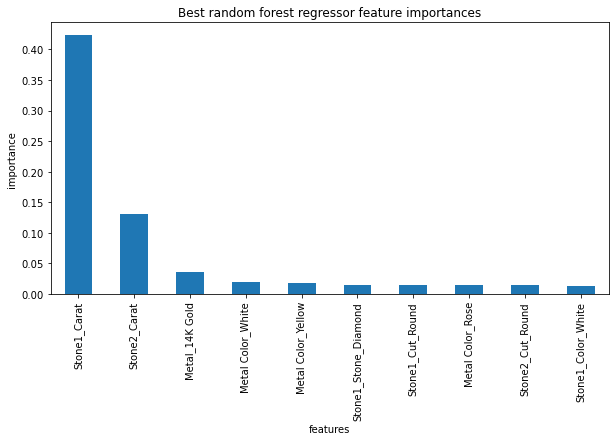

In [113]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [114]:
X_train.columns

Index(['Stone1_Carat', 'Stone2_Carat', 'Metal_14K Gold', 'Metal_18K Gold',
       'Metal_Sterling Silver', 'Metal_Sterling Silver & 14K Gold',
       'Metal_Sterling Silver & 18K Gold', 'Metal Color_Rose',
       'Metal Color_Rose and White', 'Metal Color_Rose and Yellow',
       ...
       'Stone2_Cut_Cushion', 'Stone2_Cut_Marquise', 'Stone2_Cut_Multi-Shape',
       'Stone2_Cut_Oval', 'Stone2_Cut_Pear', 'Stone2_Cut_Princess',
       'Stone2_Cut_Round', 'Stone2_Cut_Top', 'Stone2_Cut_oval',
       'Stone2_Cut_round'],
      dtype='object', length=101)

In [115]:
rf_feat_imps.head(10)

Stone1_Carat            0.423154
Stone2_Carat            0.130427
Metal_14K Gold          0.035609
Metal Color_White       0.019719
Metal Color_Yellow      0.018153
Stone1_Stone_Diamond    0.015021
Stone1_Cut_Round        0.014749
Metal Color_Rose        0.014209
Stone2_Cut_Round        0.014088
Stone1_Color_White      0.013220
dtype: float64

In [116]:
y_pred = rf_grid_cv.predict(X_test)

y_pred

array([ 2,  1,  1,  1,  2,  2,  3,  4,  2,  1,  3,  2,  1,  2,  2,  3,  2,
        1,  1,  2,  1,  3,  1,  2,  2,  3,  1,  3,  3,  1,  4,  2,  1,  3,
        2,  2,  2,  8,  1,  3,  1,  1,  3,  2,  2,  1,  8,  3,  8,  1,  2,
        4,  1,  1,  1,  4,  3,  4,  2,  3,  2,  1,  2,  1,  1,  2,  3,  2,
        2,  1,  1,  1,  2,  1,  2,  2,  1,  2,  1,  8,  8,  2,  3,  1,  2,
        2,  1,  2,  2,  1,  2,  2,  2,  3,  2,  3,  2,  1,  2,  1,  2,  3,
        1,  1,  4,  3,  5,  1,  2,  1,  3,  2,  4,  6,  2,  1,  2,  2,  2,
        5,  3,  2,  3,  4,  2,  3,  1,  1,  2,  2,  2,  2,  1,  2,  2,  2,
        3,  3,  2,  3,  1,  2,  3,  3,  2,  6,  3,  1,  1,  2,  5,  2,  1,
        2,  5,  3,  3,  1,  3,  3,  8,  1,  1,  2,  1,  1,  2,  2,  1,  1,
        2,  5,  2,  3,  2,  3,  6,  2,  2,  2,  4,  2,  3,  2,  8,  1,  2,
        2,  1,  2,  2,  2,  2,  2,  6,  2,  3,  5,  2,  3,  2,  7,  3,  2,
        2,  2,  2,  3,  2,  3,  2,  2,  3,  2,  1,  2,  2,  2,  2,  1,  2,
        1,  2,  3,  2,  3

In [117]:
print("The Accuracy score of Random Forest prediction: " ,accuracy_score(y_test, y_pred))

The Accuracy score of Random Forest prediction:  0.5321100917431193
